In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd

import os
import random


from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("../dataset/data.csv")
df.head()

,Unnamed: 0,filename,width,height,depth,cell_name,xmin,ymin,xmax,ymax
0,0,BloodImage_00000.jpg,640,480,3,RBC,78,336,184,435
1,1,BloodImage_00000.jpg,640,480,3,RBC,469,412,567,480
2,2,BloodImage_00000.jpg,640,480,3,RBC,555,356,640,455
3,3,BloodImage_00000.jpg,640,480,3,RBC,414,352,506,445
4,4,BloodImage_00000.jpg,640,480,3,RBC,214,362,320,461


In [4]:
path = "../dataset/BCCD/JPEGImages"

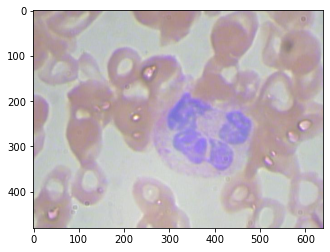

In [5]:
img = plt.imread(path+"/"+df["filename"][0])
plt.imshow(img)

In [6]:
df["cell_name"].value_counts()

RBC          4155
WBC           372
Platelets     361
Name: cell_name, dtype: int64

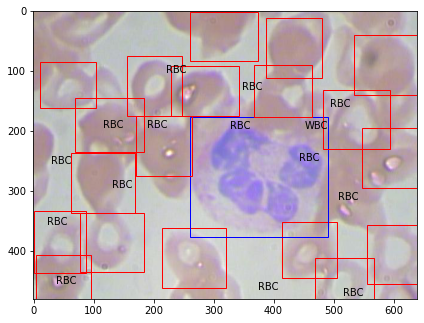

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

img = plt.imread(path+"/BloodImage_00000.jpg")
plt.imshow(img)

for _,row in df[df["filename"] == "BloodImage_00000.jpg"].iterrows():
    width = row.xmax - row.xmin
    height = row.ymax - row.ymin

    if row.cell_name == "RBC":
        edge_color = "r"
        ax.annotate("RBC", xy=(row.xmin-40, row.ymax+20))
        
    elif row.cell_name == 'WBC':
        edge_color = 'b'
        ax.annotate('WBC', xy=(row.xmax-40,row.ymin+20))
    elif row.cell_name == 'Platelets':
        edge_color = 'g'
        ax.annotate('Platelets', xy=(row.xmax-40,row.ymin+20))
    
    rect = patches.Rectangle((row.xmin, row.ymin), width, height, edgecolor=edge_color, facecolor="none")
    ax.add_patch(rect)

# Split Between Train and Test

In [8]:
file_names_list = df["filename"].unique()
number_files = df["filename"].unique().size

In [9]:
number_test = round(number_files * 0.3)

In [10]:
test_index = random.sample(range(number_files), number_test)

train_index = []
for i in range(0, number_files):
    if i not in test_index:
        train_index.append(i)

In [11]:
df_test = pd.DataFrame()
for test_file in file_names_list[test_index]:
    df_test = pd.concat([df_test, df.loc[df["filename"] == test_file]])

In [12]:
df_train = pd.DataFrame()
for train_file in file_names_list[train_index]:
    df_train = pd.concat([df_train, df.loc[df["filename"] == train_file]])


In [22]:
df_train.head()

,Unnamed: 0,filename,width,height,depth,cell_name,xmin,ymin,xmax,ymax
0,0,BloodImage_00000.jpg,640,480,3,RBC,78,336,184,435
1,1,BloodImage_00000.jpg,640,480,3,RBC,469,412,567,480
2,2,BloodImage_00000.jpg,640,480,3,RBC,555,356,640,455
3,3,BloodImage_00000.jpg,640,480,3,RBC,414,352,506,445
4,4,BloodImage_00000.jpg,640,480,3,RBC,214,362,320,461


# Save DataFrames on specific folders

In [13]:
path = os.getcwd().split("code")[0]

In [28]:
count = 0
df_test_result = pd.DataFrame(columns=["filename", "xmin", "ymin", "xmax", "ymax", "cell_name"])

for index, row in df_test.iterrows():
    df_test_result.loc[count, :] = [path+row["filename"], row["xmin"], row["ymin"], row["xmax"], row["ymax"], row["cell_name"]]
    count += 1


In [29]:
count = 0
df_train_result = pd.DataFrame(columns=["filename", "xmin", "ymin", "xmax", "ymax", "cell_name"])

for index, row in df_train.iterrows():
    df_train_result.loc[count, :] = [path+row["filename"], row["xmin"], row["ymin"], row["xmax"], row["ymax"], row["cell_name"]]
    count += 1

In [37]:
df_test_result.to_csv(path+"dataset/test_images/annotation_test.txt", header=None, index=None, sep=' ')
df_train_result.to_csv(path+"/dataset/train_images/annotation_train.txt", header=None, index=None, sep=' ')